In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file
# city = data_pd["City"]
# len(city)

'output_data/cities.csv'

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [4]:
# for city in cities:
#     print(city)

API Calls

In [5]:
count = 0
units = "Imperial"
city_names = []
set_count = 1
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
executing = ""

base_url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    try: 
        query_url = f"{base_url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query_url)
        weather = response.json()
#         pprint(weather)
        city_names.append(weather['name'])
        cloudiness.append(weather['clouds']['all'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        humidity.append(weather['main']['humidity'])
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon']) 
        max_temp.append(weather['main']['temp_max'])
        wind_speed.append(weather['wind']['speed'])

        
        count += 1

        print(f"Processing record {count} of {set_count} | {city}")

        if count >= 50:
            set_count += 1
            count = 0
    except:

        print("City not found. Skipping...") 



Beginning Data Retrieval
---------------------------
Processing record 1 of 1 | panzhihua
Processing record 2 of 1 | te anau
Processing record 3 of 1 | ranong
Processing record 4 of 1 | ibirama
Processing record 5 of 1 | albany
Processing record 6 of 1 | tuktoyaktuk
Processing record 7 of 1 | zhigansk
Processing record 8 of 1 | chuy
Processing record 9 of 1 | cape town
Processing record 10 of 1 | bengkulu
Processing record 11 of 1 | robertsport
Processing record 12 of 1 | kapaa
Processing record 13 of 1 | esperance
Processing record 14 of 1 | rikitea
Processing record 15 of 1 | busselton
Processing record 16 of 1 | arroyo
Processing record 17 of 1 | jamestown
Processing record 18 of 1 | chokurdakh
Processing record 19 of 1 | turtas
Processing record 20 of 1 | chapais
City not found. Skipping...
Processing record 21 of 1 | castro
Processing record 22 of 1 | airai
City not found. Skipping...
Processing record 23 of 1 | fairbanks
Processing record 24 of 1 | abu samrah
Processing record 25

Processing record 7 of 5 | makakilo city
Processing record 8 of 5 | ancud
Processing record 9 of 5 | ribeira grande
City not found. Skipping...
Processing record 10 of 5 | tilichiki
Processing record 11 of 5 | karpathos
Processing record 12 of 5 | ponta do sol
Processing record 13 of 5 | laguna
City not found. Skipping...
City not found. Skipping...
Processing record 14 of 5 | rawson
City not found. Skipping...
City not found. Skipping...
Processing record 15 of 5 | bony
Processing record 16 of 5 | rock sound
Processing record 17 of 5 | matara
Processing record 18 of 5 | hithadhoo
Processing record 19 of 5 | muzhi
Processing record 20 of 5 | puri
Processing record 21 of 5 | katiola
Processing record 22 of 5 | prince rupert
City not found. Skipping...
Processing record 23 of 5 | nampula
City not found. Skipping...
Processing record 24 of 5 | severnyy
Processing record 25 of 5 | goldsboro
Processing record 26 of 5 | sebina
Processing record 27 of 5 | xiuyan
Processing record 28 of 5 | so

Processing record 16 of 9 | sharan
Processing record 17 of 9 | cockburn town
Processing record 18 of 9 | vitim
Processing record 19 of 9 | faya
Processing record 20 of 9 | cayenne
Processing record 21 of 9 | wad madani
Processing record 22 of 9 | boquete
Processing record 23 of 9 | outjo
Processing record 24 of 9 | wajima
City not found. Skipping...
Processing record 25 of 9 | sovetskiy
Processing record 26 of 9 | bhainsdehi
Processing record 27 of 9 | qasigiannguit
Processing record 28 of 9 | batagay
Processing record 29 of 9 | tianpeng
Processing record 30 of 9 | chunskiy
Processing record 31 of 9 | kavaratti
Processing record 32 of 9 | rajampet
City not found. Skipping...
City not found. Skipping...
Processing record 33 of 9 | obo
Processing record 34 of 9 | el triunfo
Processing record 35 of 9 | mabaruma
Processing record 36 of 9 | waddan
Processing record 37 of 9 | burnie
Processing record 38 of 9 | maningrida
Processing record 39 of 9 | prainha
Processing record 40 of 9 | pind da

Convert Raw Data to DataFrame

    Export the city data into a .csv.
    Display the DataFrame

In [6]:
weather_data = {
     "City": city_names,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame.from_dict(weather_data, orient='index')
weather_df = weather_df.transpose()
weather_df.count()

City          597
Cloudiness    597
Country       597
Date          597
Humidity      597
Lat           597
Lng           597
Max Temp      597
Wind Speed    597
dtype: int64

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Panzhihua,0,CN,1587079437,30,26.59,101.71,68.59,0.47
1,Te Anau,85,NZ,1587079437,71,-45.42,167.72,55.99,4.54
2,Ranong,99,TH,1587079437,79,9.97,98.63,80.24,3.09
3,Ibirama,0,BR,1587079438,82,-27.06,-49.52,60.01,1.7
4,Albany,40,US,1587079438,30,42.6,-73.97,41,17.22


In [9]:
# EXPORT TO CSV
# file_one = "Resources/DataOne.csv"
# file_one_df.to_csv("Output/fileOne.csv", index=False, header=True)

weather_df.to_csv("../output_data/cities.csv",index=False, header=True)

Plotting the Data

    Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.

LATITUDE VS MAX TEMPERATURE

In [10]:
import datetime as dt

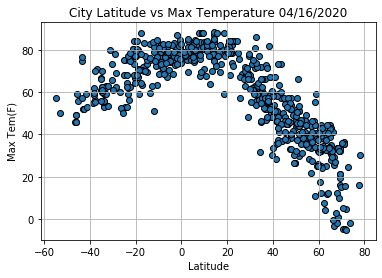

In [11]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]
date = dt.datetime.today().strftime("%m/%d/%Y")

plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.title(f"City Latitude vs Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Tem(F)")
plt.grid()
plt.show()

This plot shows that the closer we are to the equator, the higher the temperature is

In [12]:
plt.savefig("./Images/citylat_maxtemp.png")
plt.show()

<Figure size 432x288 with 0 Axes>

LATITUDE VS HUMIDITY SCATTER PLOT

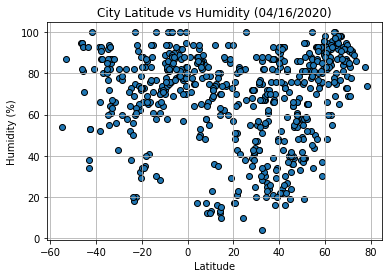

In [13]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]
date = dt.datetime.today().strftime("%m/%d/%Y")

plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.title(f"City Latitude vs Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

This plot shows that there is no correlation between latitude and humidity.

In [14]:
plt.savefig("./Images/citylat_humidity.png")
plt.show()

<Figure size 432x288 with 0 Axes>

LATITUDE VS CLOUDINESS PLOT

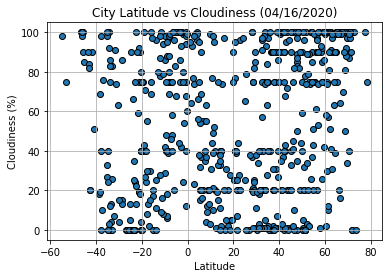

In [15]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness"]
date = dt.datetime.today().strftime("%m/%d/%Y")

plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

This plot shows that there is no relationship between latitude and cloudiness

In [16]:
plt.savefig("./Images/citylat_cloudiness.png")
plt.show()

<Figure size 432x288 with 0 Axes>

Latitude vs. Wind Speed Plot

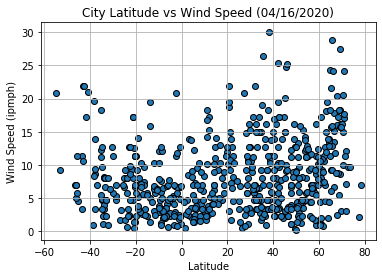

In [17]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]
date = dt.datetime.today().strftime("%m/%d/%Y")

plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (ipmph)")
plt.grid()
plt.show()

This plot shows that there is no real pattern that can describe the relationship between latitude and wind speed

In [18]:
plt.savefig("./Images/citylat_windspeed.png")
plt.show()

<Figure size 432x288 with 0 Axes>

Linear Regression

In [19]:
# Northern Hemisphere
north_hem = weather_df.loc[weather_df["Lat"]>=0, :]
north_hem

# Southern Hemisphere
south_hem = weather_df.loc[weather_df["Lat"]<0,:]
south_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Te Anau,85,NZ,1587079437,71,-45.42,167.72,55.99,4.54
3,Ibirama,0,BR,1587079438,82,-27.06,-49.52,60.01,1.7
7,Chui,4,UY,1587079438,87,-33.7,-53.46,62.49,8.14
8,Cape Town,86,ZA,1587079202,93,-33.93,18.42,59,4.7
9,Bengkulu,100,ID,1587079438,89,-3.8,102.27,76.08,5.3
...,...,...,...,...,...,...,...,...,...
584,Emerald,0,AU,1587079516,69,-23.53,148.17,77,3.36
586,Moerai,100,PF,1587079516,61,-22.43,-151.33,78.55,8.59
589,Waingapu,48,ID,1587079517,76,-9.66,120.26,80.94,3.56
591,Tual,83,ID,1587079517,77,-5.67,132.75,82.54,7.7


Max Temp vs Latitude

In [20]:
# def plot_linear_regression(x_values, y_values):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
#     plt.xlabel("Latitude")
#     plt.ylabel(title)
#     print(f"The r-squared is: {rvalue}")
#     plt.show()

The r-squared is: 0.7891922317607025


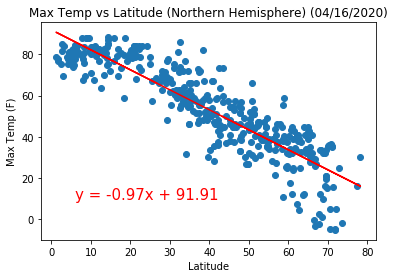

In [21]:
x_values = north_hem['Lat'].astype(float)
y_values = north_hem['Max Temp'].astype(float)
date = dt.datetime.today().strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Max Temp vs Latitude (Northern Hemisphere) ({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

This plot shows that in the northern hemisphere, the farther the city is away from the latitude, the cooler the temperature is. There is a negative correlation between temperature and latitude.

In [22]:
plt.savefig("./Images/maxtemp_lat_north.png")
plt.show()

<Figure size 432x288 with 0 Axes>

The r-squared is: 0.5291168756575854


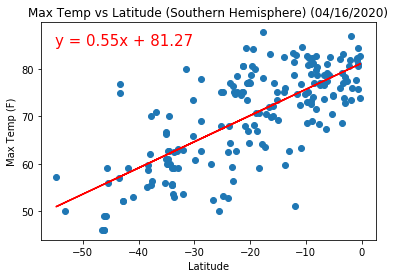

In [23]:
x_values = south_hem['Lat'].astype(float)
y_values = south_hem['Max Temp'].astype(float)
date = dt.datetime.today().strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Max Temp vs Latitude (Southern Hemisphere) ({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

This plot shows that in the southern hemisphere, the closer to the equater, the higher the temperature. There is a positve correlation between max temperature and latitude.

In [24]:
plt.savefig("./Images/maxtemp_lat_south.png")
plt.show()

<Figure size 432x288 with 0 Axes>

Humidity vs Latitude

The r-squared is: 0.08227341132616985


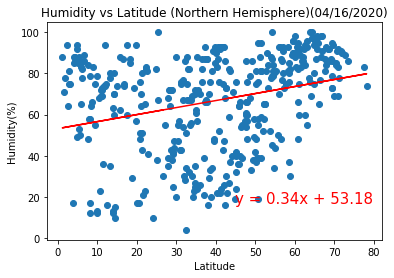

In [25]:
x_values = north_hem['Lat'].astype(float)
y_values = north_hem['Humidity'].astype(float)
date = dt.datetime.today().strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"Humidity vs Latitude (Northern Hemisphere)({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no direct correlation between humidity and latitude in the northern hemisphere.

In [26]:
plt.savefig("./Images/humidity_lat_north.png")
plt.show()

<Figure size 432x288 with 0 Axes>

The r-squared is: 0.011869867021005072


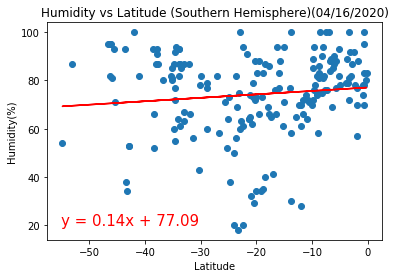

In [27]:
x_values = south_hem['Lat'].astype(float)
y_values = south_hem['Humidity'].astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"Humidity vs Latitude (Southern Hemisphere)({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no direct correlation between humidity and latitude in the southern hemisphere.

In [28]:
plt.savefig("./Images/humidity_lat_south.png")
plt.show()

<Figure size 432x288 with 0 Axes>

Cloudiness vs Latitude

The r-squared is: 0.10291772674258186


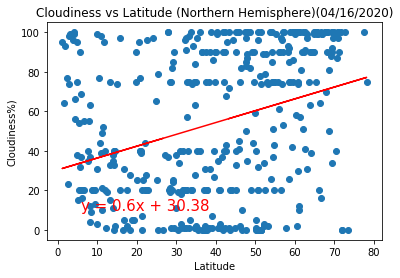

In [29]:
x_values = north_hem['Lat'].astype(float)
y_values = north_hem['Cloudiness'].astype(float)
date = dt.datetime.today().strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness%)')
plt.title(f"Cloudiness vs Latitude (Northern Hemisphere)({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

This regression line shows that there is not a correlation between cloudiness and latitude in the northern hemisphere. r-squared is very low.

In [30]:
plt.savefig("./Images/cloudiness_lat_north.png")
plt.show()

<Figure size 432x288 with 0 Axes>

The r-squared is: 0.020533134571480437


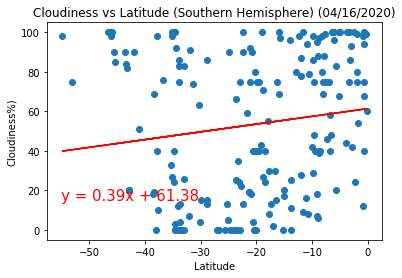

In [31]:
x_values = south_hem['Lat'].astype(float)
y_values = south_hem['Cloudiness'].astype(float)
date = dt.datetime.today().strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness%)')
plt.title(f"Cloudiness vs Latitude (Southern Hemisphere) ({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

This regression line shows that there is not a correlation between cloudiness and latitude in the southern hemisphere. r-squared is very low.

In [32]:
plt.savefig("./Images/cloudiness_lat_south.png")
plt.show()

<Figure size 432x288 with 0 Axes>

Wind Speed vs Latitude

The r-squared is: 0.055668253994540284


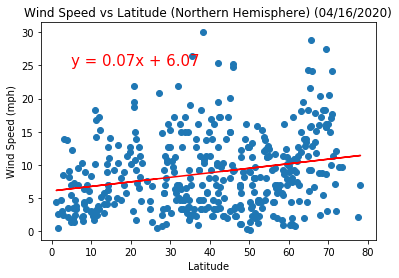

In [33]:
x_values = north_hem['Lat'].astype(float)
y_values = north_hem['Wind Speed'].astype(float)
date = dt.datetime.today().strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Wind Speed vs Latitude (Northern Hemisphere) ({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no correlation between wind speed and latitude in the northern hemisphere. The r-squared value is also low

In [34]:
plt.savefig("./Images/windspeed_lat_north.png")
plt.show()

<Figure size 432x288 with 0 Axes>

The r-squared is: 0.10015643557772744


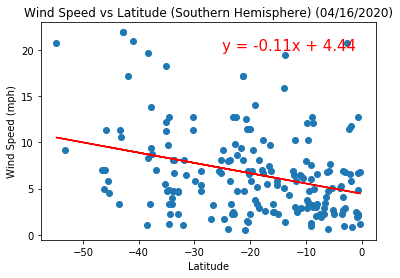

In [35]:
x_values = south_hem['Lat'].astype(float)
y_values = south_hem['Wind Speed'].astype(float)
date = dt.datetime.today().strftime("%m/%d/%Y")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Wind Speed vs Latitude (Southern Hemisphere) ({date})")
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no correlation between wind speed and latitude in the southern hemisphere. The r-squared value is also low

In [37]:
plt.savefig("./Images/windspeed_lat_south.png")
plt.show()

<Figure size 432x288 with 0 Axes>

OBSERVABLE TRENDS:

    1. The temperature increases as cities are closer to the equater. Between -20 and 20 latitude is where the temperature increases.
    2. There is no correlation between humidity and latitude as well as cloudiness and latitude.
    3. While there is no correlation between wind speed and latitude, in the Northern Hemisphere, there seems to be a lot more cities with increased wind speed the farther away from the equater.